## 18 - Détections d'oiseaux à proximité d'un parc éolien en mer à l'aide de vidéos 360°

## Clustering selon la luminosité

1 - Extraction manuelle des features avec OpenCV

In [1]:
#Import des bibliothèques
import cv2
import os
import numpy as np
from glob import glob

In [2]:
#Chargement des images
image_folder = glob("IMAGES_CLUSTERING/images/*.jpg")
images = []
brightness_values = []

#On prend une image sur N
i = 0
N = 100

for img_path in image_folder:
    if i%N == 0:
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Transposition des images en niveaux de gris

        brightness = np.mean(gray)
        brightness_values.append(brightness)
    i+=1

brightness_array = np.array(brightness_values)
brightness_values_reshaped = brightness_array.reshape(-1,1)

Clustering avec K-Means

In [3]:
from sklearn.cluster import KMeans

#Nombre de clusters optimal trouvé selon la méthode du coude -> entre 4 et 6
k_opti = 6

#On applique le K-means
kmeans = KMeans(n_clusters=k_opti, random_state=0)
labels_kmeans = kmeans.fit_predict(brightness_values_reshaped)

#Affichages des clusters
print(labels_kmeans)

[1 1 1 4 4 4 1 4 4 3 1 1 2 2 3 3 3 5 5 2 0 0 1 2 2 5 4 4 4 2 5 5 5 5 5 5 3
 3 0 5 5 5 2 2 0 3 3 4 5 5 5 1 1 0 2 2 2 2 5 5 5 5 2 2 2 5 5 5 1 1 1 4 4 4
 5 5 5 4 4 4 2 2 2 2 2 0 0 0 0 5 2 2 2 2 2 5 5 2 2 2 2 2 2 2 3 3 3 0 0 5 2
 1 1 0 0 0 5 5 5 5 5 2 3 4 2 2 5 5 1 1 1 3 3 3 3 3 3 2 2 2 3 3 3 3 3 3 2 2
 1 1 1 4 4 4 1 1 1 1 1 1 1 1 1 2 2 2 4 4 4 3 2 2 3 4 5 5 5 5 1 1 1 3 3 3 2
 3 3 1 3 4 3 4 4 4 0 0 4 4 4 2 2 2 2 2 2 1 0]


Affichage des résultats

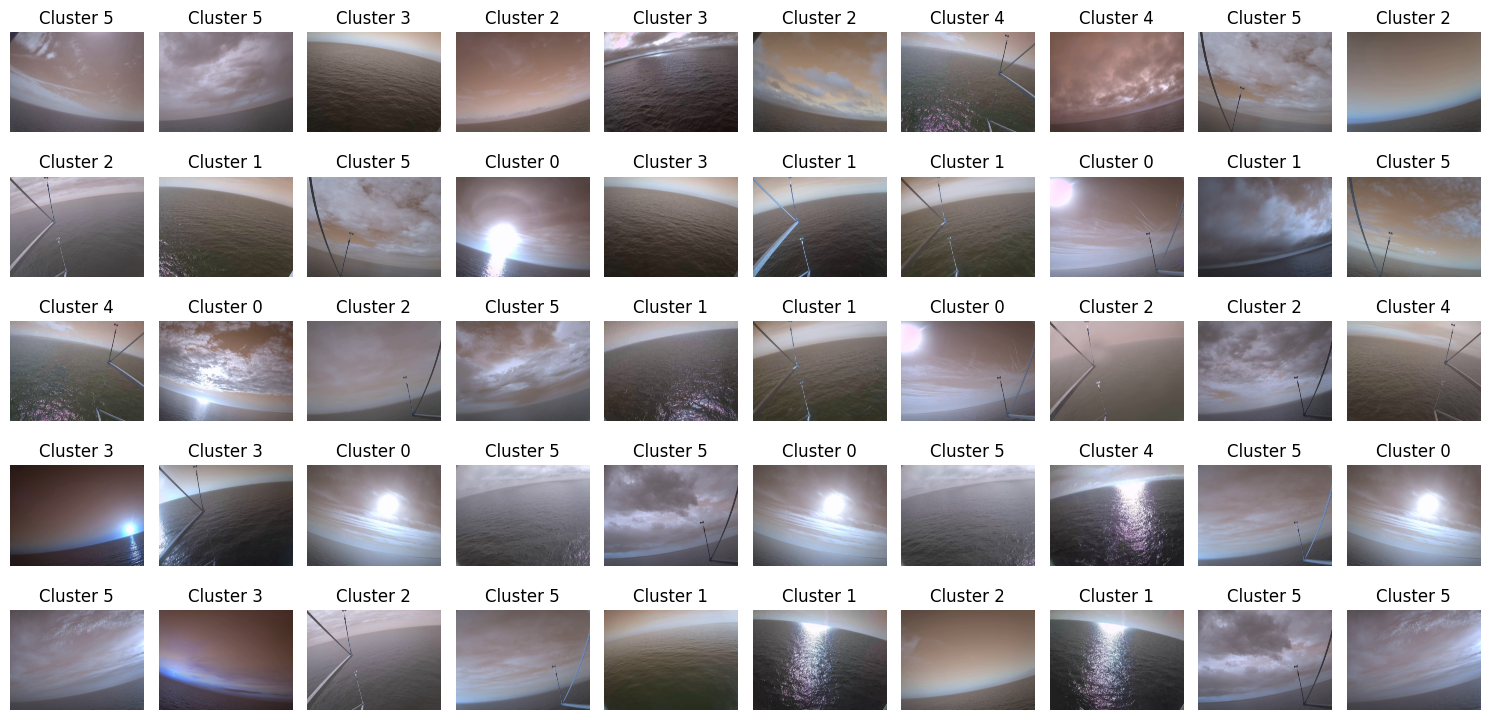

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def afficher_photos_aleatoires(images, labels_kmeans, num_photos=50):
    """
    Affiche un ensemble de photos choisies aléatoirement avec leurs étiquettes de cluster.

    Paramètres :
    - images : liste ou tableau contenant les images (chaque image est un tableau).
    - labels : tableau des étiquettes de cluster correspondant à chaque image.
    - num_photos : nombre de photos à afficher (défaut 50).
    """
    # Sélectionne des indices aléatoires
    indices = np.random.choice(len(images), num_photos, replace=False)

    # Paramètres pour l'affichage
    nb_colonnes = 10  # Nombre de colonnes de l'affichage
    nb_lignes = num_photos // nb_colonnes + (num_photos % nb_colonnes > 0)

    # Crée une figure pour afficher les images
    plt.figure(figsize=(15, nb_lignes * 1.5))

    for i, idx in enumerate(indices):
        plt.subplot(nb_lignes, nb_colonnes, i + 1)
        plt.imshow(images[idx])  # Affiche l'image
        plt.title(f'Cluster {labels_kmeans[idx]}')  # Affiche l'étiquette
        plt.axis('off')  # Cache les axes pour une meilleure visibilité

    plt.tight_layout()
    plt.show()

# Utilisation :
# Supposons que `images` contient toutes les images et `labels` les étiquettes de cluster
# afficher_photos_aleatoires(images, labels)

images_un_sur_N = [cv2.imread(img_path) for img_path in image_folder[::N]]

afficher_photos_aleatoires(images_un_sur_N, labels_kmeans)